In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# -------------------- Load and Preprocess Dataset --------------------

# Load the dataset with the correct delimiter
red_wine = pd.read_csv("./winequality-red.csv", sep=";", engine="python")
white_wine = pd.read_csv("./winequality-white.csv", sep=";", engine="python")

# Clean column names (remove quotes/spaces if needed)
red_wine.columns = [col.strip().replace('"', '') for col in red_wine.columns]
white_wine.columns = [col.strip().replace('"', '') for col in white_wine.columns]

# Add a column to differentiate red and white wines
red_wine["wine_type"] = "red"
white_wine["wine_type"] = "white"

# Combine datasets
df = pd.concat([red_wine, white_wine], axis=0).reset_index(drop=True)

# Print column names to verify
print("Column Names:", df.columns.tolist())

# Display dataset info
print("Dataset Info:\n")
print(df.info())

# Display first few rows
print("First 5 Rows:")
print(df.head())

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Column Names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'wine_type']
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  

In [3]:
# -------------------- Data Preprocessing --------------------

# Define features and target variable
X = df.drop(columns=["quality", "wine_type"])  # Exclude target column
y = df["quality"]

# Normalize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for easier visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Data Normalized. Sample values:")
print(X_scaled_df.head())

Data Normalized. Sample values:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol  
0 -0.91546


Explained Variance Ratio for PCA Components: [0.2754426  0.22671146]


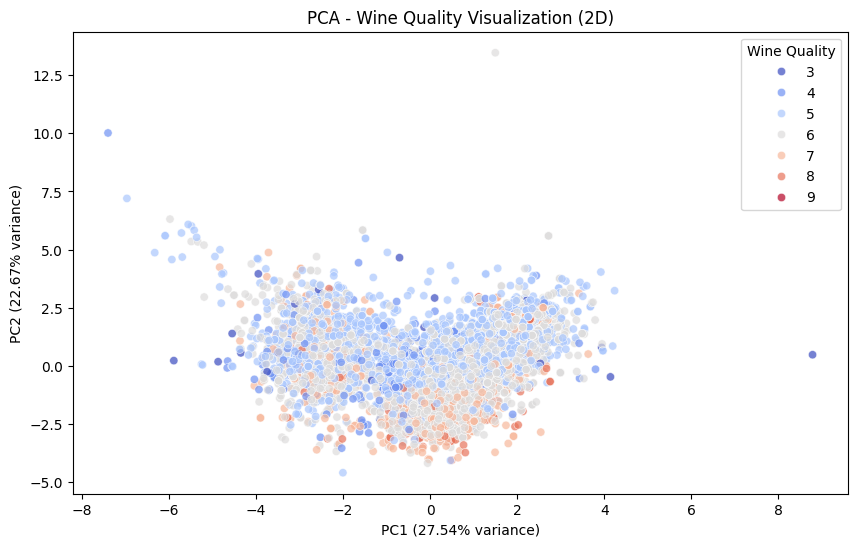

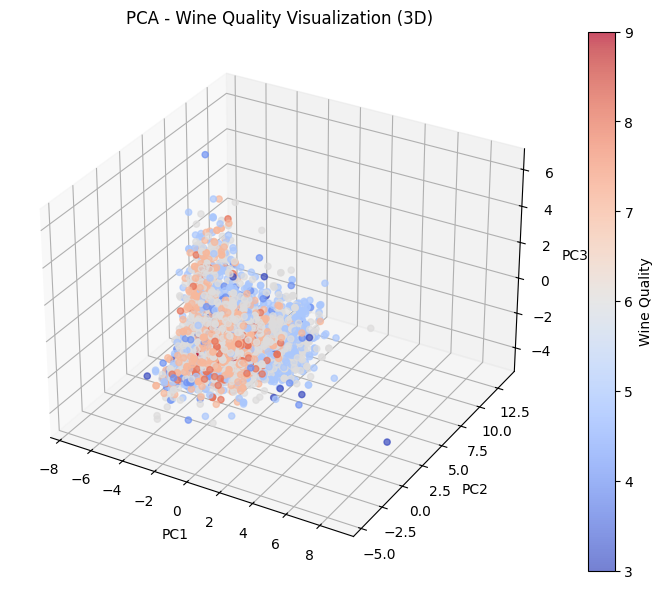

In [4]:
# -------------------- PCA --------------------

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for PCA Components:", explained_variance)

# Convert PCA results to DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["quality"] = y

# 2D PCA Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue=y, palette="coolwarm", alpha=0.7)
plt.title("PCA - Wine Quality Visualization (2D)")
plt.xlabel(f"PC1 ({explained_variance[0]:.2%} variance)")
plt.ylabel(f"PC2 ({explained_variance[1]:.2%} variance)")
plt.legend(title="Wine Quality", loc="upper right")
plt.show()

# 3D PCA Scatter Plot
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)
df_pca_3d = pd.DataFrame(X_pca_3d, columns=["PC1", "PC2", "PC3"])
df_pca_3d["quality"] = y

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca_3d["PC1"], df_pca_3d["PC2"], df_pca_3d["PC3"], 
                     c=y, cmap="coolwarm", alpha=0.7)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("PCA - Wine Quality Visualization (3D)")
plt.colorbar(scatter, label="Wine Quality")
plt.show()

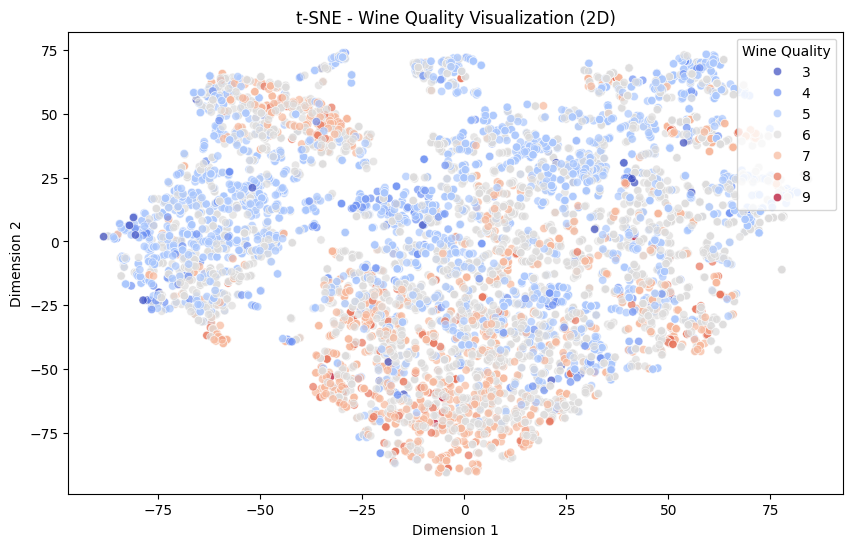

In [5]:
# -------------------- t-SNE --------------------

# Apply t-SNE to obtain 2D representation
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Convert t-SNE results to DataFrame
df_tsne = pd.DataFrame(X_tsne, columns=["Dim1", "Dim2"])
df_tsne["quality"] = y

# t-SNE Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x="Dim1", y="Dim2", hue=y, palette="coolwarm", alpha=0.7)
plt.title("t-SNE - Wine Quality Visualization (2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Wine Quality", loc="upper right")
plt.show()

# -------------------- PCA vs t-SNE Comparison --------------------

Comparison of PCA and t-SNE:
- PCA preserves global structure but may lose fine details.
- t-SNE is better at capturing local structure and clusters but can be less interpretable.
- PCA provides principal components with variance explanation, while t-SNE does not.